<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/Preprocessing_Transformation_Ex_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [3]:
!unzip train
!ls

Archive:  train.zip
  inflating: train.csv               
sample_data  train.csv	train.zip


In [4]:
# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [5]:
train_raw = pd.read_csv('train.csv')
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = train_raw.copy()

print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [27]:
# === EXAMPLE: What duplicates look like ===
duplicated_df = df[df.duplicated(keep=False)]
duplicated_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
print(df.duplicated(subset=['Pclass', 'Age']).sum())

706


In [29]:
#Exercise 2

# Count missing values: df.isnull().sum()
# Calculate missing percentage
# Display only columns with missing values
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame(
    {
        'Missing Count': missing_counts,
        'Missing %': missing_pct
    }
)

missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


In [30]:
# Drop 'Cabin' column (77% missing)
df.drop(columns=['Cabin'])
df.columns
print(f"Number of columns BEFORE dropping: {len(df.columns)}")
df = df.drop(columns=['Cabin'])
print(f"Number of columns AFTER dropping: {len(df.columns)}")


Number of columns BEFORE dropping: 12
Number of columns AFTER dropping: 11


In [31]:
# Create imputer with strategy='median'
# Apply fit_transform to age column
# Check imputer.statistics_ to see value used
print(f"Age missing before: {df['Age'].isnull().sum()}")

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

print(f" Median age used: {age_imputer.statistics_[0]}")
print(f"Age missing after: {df['Age'].isnull().sum()}")

Age missing before: 177
 Median age used: 28.0
Age missing after: 0


In [32]:
#fillna using mode
#before
print(df['Embarked'].isnull().sum())
print(df['Embarked'].mode())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
#after
print(df['Embarked'].isnull().sum())


2
0    S
Name: Embarked, dtype: object
0


In [33]:
#Exercise 3

#Family Size from SibSp and Parch
# Look at family columns: sibsp (siblings/spouses) and parch (parents/children)
df[['SibSp', 'Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [34]:
# family_size = sibsp + parch + 1 (include the passenger)
# Check the distribution
df['family_size'] = df['SibSp'] + df['Parch'] + 1

df['family_size'].value_counts().sort_index()

,count
family_size,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [35]:
survival_by_family = df.groupby('family_size')['Survived'].mean() * 100

survival_by_family

,Survived
family_size,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [36]:
survival_by_sib_parch = df.groupby(['Parch','SibSp'])['Survived'].mean() * 100

survival_by_sib_parch

Parch  SibSp
0      0         30.353818
       1         52.032520
       2         25.000000
       3        100.000000
1      0         65.789474
       1         59.649123
       2         85.714286
       3          0.000000
       4          0.000000
2      0         72.413793
       1         63.157895
       2         50.000000
       3         28.571429
       4         33.333333
       5          0.000000
       8          0.000000
3      0        100.000000
       1         33.333333
       2        100.000000
4      0          0.000000
       1          0.000000
5      0          0.000000
       1         33.333333
6      1          0.000000
Name: Survived, dtype: float64

In [37]:
# Pattern: "Lastname, Title. Firstname"
# What titles can you spot?
df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [38]:
# Check value_counts() of extracted titles

df['title'] = df['Name'].str.extract(r',\s*([^.]+)\.')

df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [39]:
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Mlle': 'Miss',
    'Major': 'Rare',
    'Ms': 'Mrs',
    'Mme': 'Mrs',
    'Don': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Jonkheer': 'Rare'
}

df['title'] = df['title'].map(title_mapping)
df['title'].value_counts()

,count
title,
Mr,517
Miss,184
Mrs,127
Master,40
Rare,23


In [40]:
# Which titles had best/worst survival?

survival_by_title = df.groupby('title')['Survived'].mean() * 100

survival_by_title


,Survived
title,
Master,57.500000
Miss,70.108696
Mr,15.667311
Mrs,79.527559
Rare,34.782609


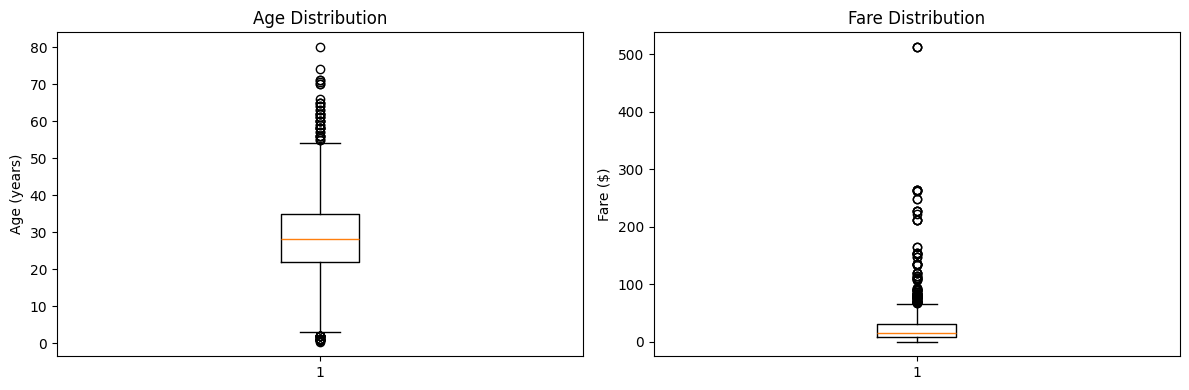


Boxplot interpretation:
  Box = middle 50% of data (Q1 to Q3)
  Line in box = median
  Whiskers = 1.5 × IQR from box
  Dots outside whiskers = OUTLIERS


In [42]:
#Exercise 4
# Visualize distributions with boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df['Age'].dropna())
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Age (years)')

axes[1].boxplot(df['Fare'].dropna())
axes[1].set_title('Fare Distribution')
axes[1].set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

print("\nBoxplot interpretation:")
print("  Box = middle 50% of data (Q1 to Q3)")
print("  Line in box = median")
print("  Whiskers = 1.5 × IQR from box")
print("  Dots outside whiskers = OUTLIERS")

In [43]:
# Detecting outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Calculate upper/lower bounds
# Count outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): ${Q1}")
print(f"Q3 (75th percentile): ${Q3}")
print(f"IQR: ${IQR}")

print(f"Lower bound: ${lower_bound}")
print(f"Upper bound: ${upper_bound}")

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print(f"Outliers detected: {len(outliers)/len(df) * 100:.1f}% of data")

Q1 (25th percentile): $7.9104
Q3 (75th percentile): $31.0
IQR: $23.0896
Lower bound: $-26.724
Upper bound: $65.6344
Outliers detected: 13.0% of data


In [44]:
fare_cap = df['Fare'].quantile(0.98)
print(f"Capping fare at 98th percentile: ${fare_cap}")

outliers_count = (df['Fare'] > fare_cap).sum()
print(f"Values to be capped: {outliers_count}")

print("Before capping")
print(f"Max fare: ${df['Fare'].max()}")
#removal of outliers
df['Fare'] = df['Fare'].clip(upper=fare_cap)
print("After capping")
print(f"Max fare: ${df['Fare'].max()}")

Capping fare at 98th percentile: $211.3375
Values to be capped: 17
Before capping
Max fare: $512.3292
After capping
Max fare: $211.3375


In [45]:
#Exercise 5
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['Age']])
df[['Age','age_scaled']].head()

,Age,age_scaled
0,22.0,-0.565736
1,38.0,0.663861
2,26.0,-0.258337
3,35.0,0.433312
4,35.0,0.433312


In [46]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
df['fare_scaled'] = minmax_scale.fit_transform(df[['Fare']]).ravel()
df[['Fare','fare_scaled']].head()

,Fare,fare_scaled
0,7.2500,0.034305
1,71.2833,0.337296
2,7.9250,0.037499
3,53.1000,0.251257
4,8.0500,0.038091


In [47]:
#Exercise 6
#ONE-HOT ENCODE Embarked
print(f"embarked: {df['Embarked'].unique()}")
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True).astype(int)
embarked_dummies.head()

embarked: ['S' 'C' 'Q']


,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#ONE-HOT ENCODE Title
print(f"Title: {df['title'].unique()}")
title_dummies = pd.get_dummies(df['title'], prefix='Title', drop_first=True).astype(int)
title_dummies.head()


Title: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [51]:
df = pd.concat([df, embarked_dummies, title_dummies, ], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,1,0,1,0,0


In [53]:
#LABEL ENCODE
sex_mapping = {'male': 0, 'female': 1}

df['sex_encoded'] = df['Sex'].map(sex_mapping)

print(df[['Sex', 'sex_encoded']].head())

      Sex  sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0


In [62]:
#Exercise 7
#  CREATE AGE GROUPS
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#  SURVIVAL BY AGE GROUP
survival_by_age = df.groupby('age_group', observed=True)['Survived'].mean() * 100
survival_by_age

#  ONE-HOT ENCODE AGE GROUP
age_group_dummies = pd.get_dummies(df['age_group'], prefix='Age_group', drop_first=True).astype(int)
age_group_dummies.head()

,Age_group_Teen,Age_group_Adult,Age_group_Senior
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
